In [182]:
class optionplot:
    def __init__(self,S0,K,r,T,sigma,interval):
        self.S0=S0
        self.K=K
        self.r=r
        self.T=T
        self.sigma=sigma
        self.interval=interval
        
    def opD1(self):
        from math import log, sqrt, exp 
        return (log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))                                                                                                                     
    
    def opD2(self):
        from math import log, sqrt, exp 
        return self.opD1()-sigma*sqrt(T)
    
    def BSM(self,type='call'):
        from math import log, sqrt, exp 
        from scipy import stats
        
        if type=='call':
            C0=S0*stats.norm.cdf(self.opD1(),0,1)-exp(-r*T)*K*stats.norm.cdf(self.opD2(),0,1)            
            print('標的價格：' + str(self.S0) + '\n執行價：' + str(self.K) + '\n波動度:' + str(self.sigma) + '\n無風險利率：' + str(self.r) + '\n到期期間：' + str(self.T) + '年')
            print('call option:'+str(C0))
            %matplotlib notebook
            import numpy as np
            ST=np.arange(K-interval,K+interval)
            payoff_longcall=np.maximum(ST-K,0)-C0
            payoff_shortcall=-payoff_longcall
            import matplotlib.pyplot as plt
            plt.figure(1)
            plt.title("long call")
            plt.plot(ST,payoff_longcall,color='#FF7744',ls='-.',linewidth=2,label='longcall')
            plt.xlabel("K")
            plt.ylabel("payoff")
            plt.axhline(y=0,color='black',ls=':')
            plt.axvline(K,color='black',ls=':')
            plt.axvline(K+C0,color='black',ls=':')
            plt.text(ST[0],int(-C0),int(-C0))
            plt.text(K,0,K)
            plt.text(K+int(C0),0,K+int(C0))
            plt.legend(loc='upper left')
            plt.show()
            
            plt.figure(2)
            plt.title("short call")
            plt.plot(ST,payoff_shortcall,color='#5599FF',label='shortcall')
            plt.xlabel("K")
            plt.ylabel("payoff")
            plt.axhline(y=0,color='black',ls=':')
            plt.axvline(K,color='black',ls=':')
            plt.axvline(K+C0,color='black',ls=':')            
            plt.text(ST[0],int(C0),int(C0))
            plt.text(K,0,K)
            plt.text(K+int(C0),0,K+int(C0))
            plt.legend(loc='upper left')
            plt.show()
            
            
        elif type=='put':
            P0=exp(-r*T)*K*stats.norm.cdf(-self.opD2(),0,1)-S0*stats.norm.cdf(-self.opD1(),0,1)            
            print('標的價格：' + str(self.S0) + '\n執行價：' + str(self.K) + '\n波動度:' + str(self.sigma) + '\n無風險利率：' + str(self.r) + '\n到期期間：' + str(self.T) + '年')
            print('put option:'+str(P0))
            %matplotlib notebook
            import numpy as np
            ST=np.arange(K-interval,K+interval)
            payoff_longput=np.maximum(K-ST,0)-P0
            payoff_shortput=-payoff_longput
            import matplotlib.pyplot as plt
            plt.title("put option")
            plt.plot(ST,payoff_longput,label='longput')
            plt.plot(ST,payoff_shortput,label='shortput')
            plt.axhline(0,color='black',ls='dashed')
            plt.axvline(K,color='black',ls='dashed')
            plt.axvline(K-P0,color='black',ls='dashed')
            plt.xlabel("K")
            plt.ylabel("payoff")
            plt.text(ST[interval+(interval-100)],P0,P0)
            plt.text(ST[interval+(interval-100)],-P0,-P0)
            plt.text(K,0,K)
            plt.text(K-P0,0,K-P0)
            plt.legend(loc='upper right')
            plt.show()
        
        
        
    def MC(self,N=100000,type='call'):
        import numpy 
        z=numpy.random.standard_normal(N)
        ST=S0*numpy.exp((r-0.5*sigma**2)*T+sigma*numpy.sqrt(T)*z)
        
        if type=='call':
            CT=numpy.maximum(ST-K,0)
            C0=numpy.sum(numpy.exp(-r*T)*CT)/N
            print('標的價格：' + str(self.S0) + '\n執行價：' + str(self.K) + '\n波動度:' + str(self.sigma) + '\n無風險利率：' + str(self.r) + '\n到期期間：' + str(self.T) + '年')
            print('call option:'+str(C0))            
            %matplotlib notebook
            import numpy as np
            ST=np.arange(K-interval,K+interval)
            payoff_longcall=np.maximum(ST-K,0)-C0
            payoff_shortcall=-payoff_longcall
            import matplotlib.pyplot as plt
            plt.title("call option")
            plt.plot(ST,payoff_longcall,color='#00AA88',ls='-.',linewidth=2,label='longcall')
            plt.plot(ST,payoff_shortcall,color='#007799',label='shortcall')
            plt.xlabel("K")
            plt.ylabel("payoff")
            plt.axhline(y=0,color='black',ls=':')
            plt.axvline(K,color='black',ls=':')
            plt.axvline(K+C0,color='black',ls=':')
            plt.text(ST[0],int(C0),int(C0))
            plt.text(ST[0],int(-C0),int(-C0))
            plt.text(K,0,K)
            plt.text(K+int(C0),0,K+int(C0))
            plt.legend(loc='upper left')
            plt.show()
            
        if type=='put':
            PT=numpy.maximum(K-ST,0)
            P0=numpy.sum(numpy.exp(-r*T)*PT)/N
            print('標的價格：' + str(self.S0) + '\n執行價：' + str(self.K) + '\n波動度:' + str(self.sigma) + '\n無風險利率：' + str(self.r) + '\n到期期間：' + str(self.T) + '年')
            print('put option:'+str(P0))        
            %matplotlib notebook
            import numpy as np
            ST=np.arange(K-interval,K+interval)
            payoff_longput=np.maximum(K-ST,0)-P0
            payoff_shortput=-payoff_longput
            import matplotlib.pyplot as plt
            plt.title("put option")
            plt.plot(ST,payoff_longput,label='longput')
            plt.plot(ST,payoff_shortput,label='shortput')
            plt.axhline(0,color='black',ls='dashed')
            plt.axvline(K,color='black',ls='dashed')
            plt.axvline(K-P0,color='black',ls='dashed')
            plt.xlabel("K")
            plt.ylabel("payoff")
            plt.text(ST[interval+(interval-100)],P0,P0)
            plt.text(ST[interval+(interval-100)],-P0,-P0)
            plt.text(K,0,K)
            plt.text(K-P0,0,K-P0)
            plt.legend(loc='upper right')
            plt.show()            
    
            


In [183]:
S0=9000
K=9100
r=0.05
T=0.5
sigma=0.3
interval=1500

optionplot=optionplot(S0,K,r,T,sigma,interval)

標的價格：9000
執行價：9100
波動度:0.3
無風險利率：0.05
到期期間：0.5年
call option:818.930015571


<IPython.core.display.Javascript object>


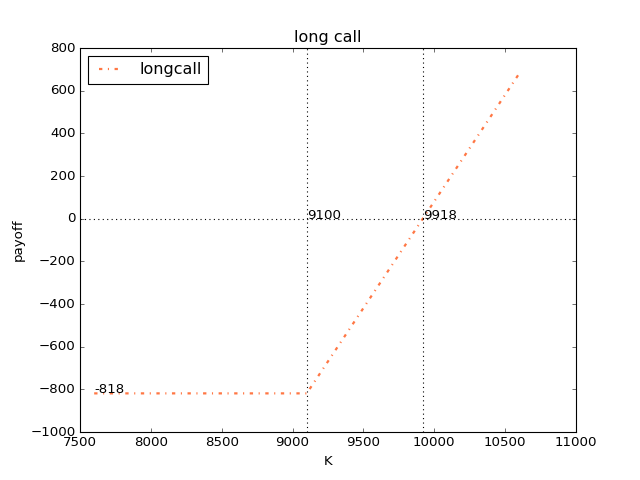

<IPython.core.display.Javascript object>


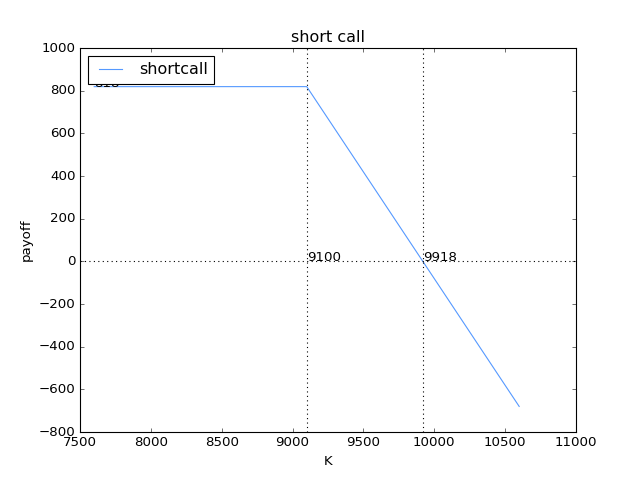

In [184]:
optionplot.BSM('call')

標的價格：9000
執行價：9100
波動度:0.3
無風險利率：0.05
到期期間：0.5年
put option:694.250215028


<IPython.core.display.Javascript object>


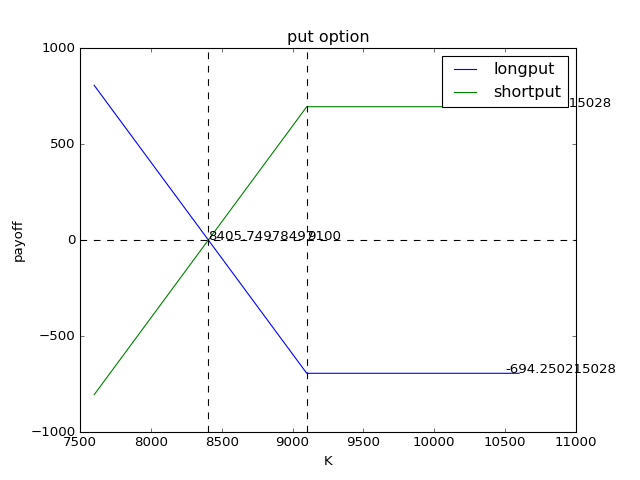

In [185]:
optionplot.BSM('put')

標的價格：9000
執行價：9100
波動度:0.3
無風險利率：0.05
到期期間：0.5年
call option:821.423470094


<IPython.core.display.Javascript object>


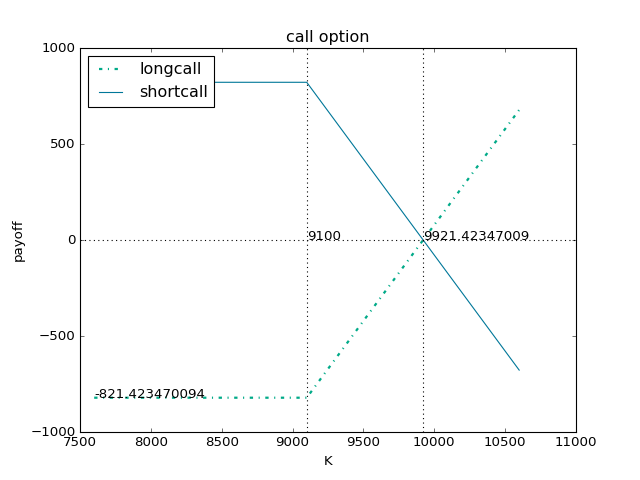

In [177]:
optionplot.MC(100000,'call')

標的價格：9000
執行價：9100
波動度:0.3
無風險利率：0.05
到期期間：0.5年
put option:692.222199937


<IPython.core.display.Javascript object>


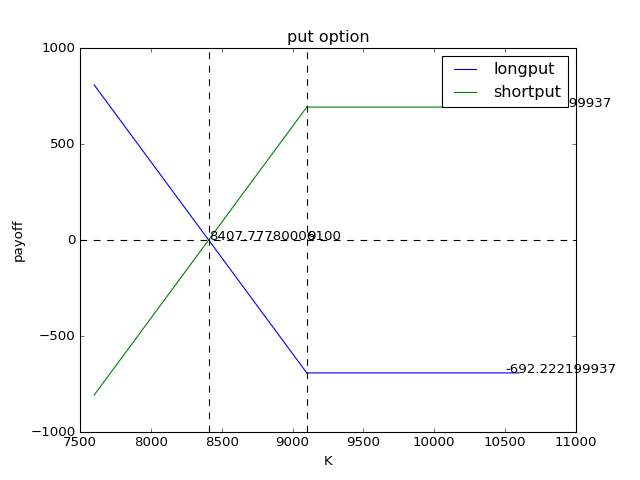

In [178]:
optionplot.MC(100000,'put')